# PART 1

##### TASK 1: IMPORTING VISUALIZING AND ANALYZING


The file has been downloaded to the system directory and from here, we'll try and visualize some training sample pictures. 
First let's import some libraries

In [36]:
import tensorflow as tf

In [37]:
import numpy as np
import pandas as pd

In [38]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#this object will be later useful to make multiple useful versions of each image sample. 

let's make a dictionary of paths for each image sample in the directory which we will reference later to visualize the respective sample image. 

Before that we need to import some necessary files. 

In [39]:
import os
import cv2
import skimage.io as io
import matplotlib.pyplot as plt
from skimage.transform import resize

In [40]:
path = r"C:\Users\Vishak\Great Learning\Computer Vision\Computer Vision Project\Plant Seedling Classification Data\train"

#while testing the path can be appropriately changed. 

###### VISUALIZATION

In [6]:
paths = {}
i = 0
for folder in os.listdir(path): #folders for all the seedlings are being indexed across in the 'train' folder
    for image in os.listdir(path+"\\" + folder): #each seedling pick's path is being taken across every folder
        i+=1
        temp_path = path + "\\" + folder + "\\" + image
        paths[str(i)] = temp_path 
        

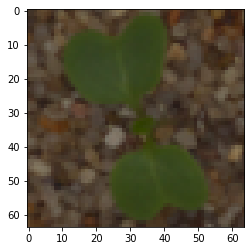

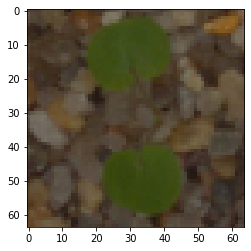

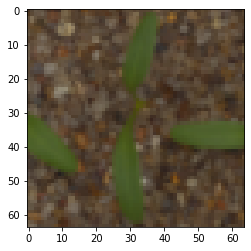

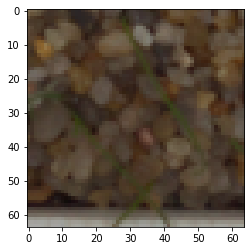

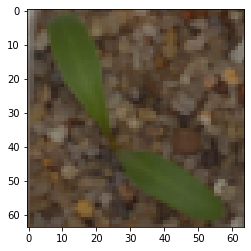

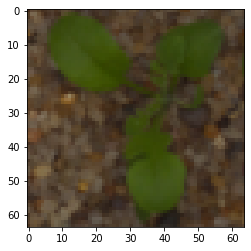

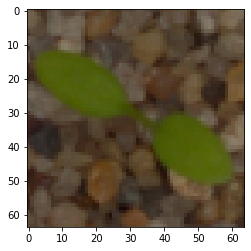

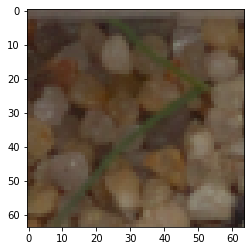

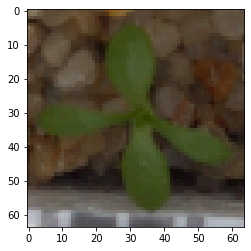

In [7]:
for i in list(np.arange(1,10)):
    img_path = paths[str(np.random.randint(1,4767))]
    img = io.imread(img_path) 
    img = resize(image=img, output_shape=(64,64,3))  #resizing it for simpler visualization
    plt.imshow(img)
    plt.show()





###### So the seedling pictures have been visualized. Here onwards, each picture is going to have different modified versions for training purpose. 

##### DATA PREPROCESSING 

Before proceeding to the training phase we need to make sure the model recognises the image regardless of it's many real life forms and therefore we're required to modify the picture in various aspects and therefore create multiple versions of the same. Therefore, some libraries need to included for that purpose. 

###### TRAIN TEST SPLIT: 

All images need to be split into train and test sets and allocated back to their respective folders to have the provision of labelling each image based on its original folder. 

In [90]:
import splitfolders
input_folder = path
output_folder = "Seedling Data"
splitfolders.ratio(input_folder, output = output_folder, seed=42, ratio=(.8, 0, .2)) 



Copying files: 0 files [00:00, ? files/s]

Copying files: 28 files [00:00, 272.16 files/s]

Copying files: 64 files [00:00, 321.46 files/s]

Copying files: 97 files [00:00, 287.40 files/s]

Copying files: 129 files [00:00, 297.79 files/s]

Copying files: 160 files [00:00, 287.76 files/s]

Copying files: 190 files [00:00, 278.94 files/s]

Copying files: 232 files [00:00, 320.41 files/s]

Copying files: 265 files [00:00, 299.37 files/s]

Copying files: 313 files [00:00, 350.19 files/s]

Copying files: 349 files [00:01, 352.56 files/s]

Copying files: 385 files [00:01, 331.41 files/s]

Copying files: 419 files [00:01, 300.09 files/s]

Copying files: 450 files [00:01, 269.03 files/s]

Copying files: 478 files [00:01, 229.44 files/s]

Copying files: 517 files [00:01, 266.40 files/s]

Copying files: 563 files [00:01, 313.39 files/s]

Copying files: 611 files [00:01, 356.85 files/s]

Copying files: 654 files [00:02, 371.36 files/s]

Copying files: 713 files [00:02, 431.56 files/s]

Copying 

In [100]:
import pathlib
path = str(pathlib.Path().absolute())

To save some time instead of automating the process of opening and setting paths as required, I have copied the paths manually. Please remember to change the paths accordingly before re execution. 

In [8]:
train_path = "C:\\Users\Vishak\\Great Learning\\Computer Vision\\Computer Vision Project\\Seedling Data\\train"
test_path = "C:\\Users\Vishak\\Great Learning\\Computer Vision\\Computer Vision Project\\Seedling Data\\test"

In [9]:
train_set = []
y_train = []
test_set = []
for folder in os.listdir(train_path):                         #getting the train path
    for image in os.listdir(os.path.join(train_path,folder)): #getting the path of each folder
        img_path = os.path.join(train_path,folder,image)      #getting the path of each image in every folder. 
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)        
        img = cv2.resize(img, (64, 64))        
        train_set.append(img)
        y_train.append(folder)

In [10]:
y_test = []
for folder in os.listdir(test_path):
    for image in os.listdir(os.path.join(test_path,folder)):
        img_path = os.path.join(test_path,folder,image)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)        
        img = cv2.resize(img, (64, 64))        
        test_set.append(img)
        y_test.append(folder)

In [11]:
train_set = np.asarray(train_set) #if any confusion occurs just run the above cells againt to get back the original form. 
test_set = np.asarray(test_set)


In [12]:
#Min Max scaling of the training and test arrays. 

train_set = (train_set -np.min(train_set))/(np.max(train_set) - np.min(train_set))
test_set = (test_set -np.min(test_set))/(np.max(test_set) - np.min(test_set))
                                 


It's also important to label encode the target variabes, so here goes:

In [13]:
y_train = pd.DataFrame(y_train, columns = ['labels'])
y_test = pd.DataFrame(y_test, columns = ['labels'])

In [5]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(y_train['labels'])

In [15]:
class_key = le.classes_
class_key

array(['Black-grass', 'Charlock', 'Cleavers', 'Common Chickweed',
       'Common wheat', 'Fat Hen', 'Loose Silky-bent', 'Maize',
       'Scentless Mayweed', 'Shepherds Purse',
       'Small-flowered Cranesbill', 'Sugar beet'], dtype=object)

In [16]:
y_train = le.transform(y_train)
y_test = le.transform(y_test)

c:\users\vishak\anaconda3\envs\gputest\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [17]:
train_set_flat = train_set.reshape(train_set.shape[0], train_set.shape[1]*train_set.shape[2])
test_set_flat = test_set.reshape(test_set.shape[0], test_set.shape[1]*test_set.shape[2])

In [18]:
train_set_flat.shape

(3807, 4096)

In [6]:
from sklearn.linear_model import LogisticRegression

In [22]:
lr = LogisticRegression(max_iter=1000)
lr.fit(train_set_flat,y_train)

c:\users\vishak\anaconda3\envs\gputest\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(max_iter=1000)

In [23]:
y_pred = lr.predict(test_set_flat)

In [7]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print('Model accuracy is: ', accuracy)

#### SUPERVISED MODEL TESTING



In [8]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

Regular supervised learning models

In [31]:
def fit_n_print(model,x_train,x_test,y_train,y_test):
    from sklearn import metrics 
    model.fit(x_train,y_train)
    pred = model.predict(x_test)
    score = round(model.score(x_test,y_test),3)

    
    return score
    

Ensemble Learning Models

In [67]:
def bag_n_print(model,x_train,x_test,y_train,y_test):
    from sklearn import metrics
    model.fit(x_train,y_train)
    bgcl = BaggingClassifier(base_estimator=model, n_estimators=7, random_state=1)
    bgcl.fit(x_train,y_train)
    pred = bgcl.predict(x_test)
    score = bgcl.score(x_test,y_test)    

    
    return score 

In [68]:
def boost_n_print(model,x_train,x_test,y_train,y_test):
    from sklearn import metrics
    model.fit(x_train,y_train)
    abcl = AdaBoostClassifier(base_estimator = model,n_estimators=7,random_state=1,algorithm='SAMME')
    
    #[Discrete SAMME AdaBoost adapts based on errors in predicted class labels whereas real SAMME.R uses
    #the predicted class probabilities.]
    
    abcl = abcl.fit(x_train,y_train)
    pred = abcl.predict(x_test)
    score = abcl.score(x_test,y_test)
    

    
    return score

In [40]:
lr = LogisticRegression(solver = 'liblinear',max_iter=1000)
lr_accuracy = fit_n_print(lr,train_set_flat,test_set_flat,y_train,y_test)

In [41]:
lr_result = pd.DataFrame({'Model':['lr_original'],
                       'Accuracy':[lr_accuracy]})
lr_result

,Model,Accuracy
0,lr_original,0.162


 The loss fails to converge for a regular logistic regresssion model. 

In [44]:
lr_accuracy = bag_n_print(lr,train_set_flat,test_set_flat,y_train,y_test) #bagging with just 7 estimators

In [45]:
temp_result = pd.DataFrame({'Model':['lr_bag'],
                       'Accuracy':[lr_accuracy]})

lr_result = pd.concat([lr_result,temp_result],axis = 0)
lr_result

,Model,Accuracy
0,lr_original,0.162000
0,lr_bag,0.158333


The loss fails to converge even post bagging. 

In [47]:
lr_accuracy = boost_n_print(lr,train_set_flat,test_set_flat,y_train,y_test)

In [48]:
temp_result = pd.DataFrame({'Model':['lr_boost'],
                       'Accuracy':[lr_accuracy]})

lr_result = pd.concat([lr_result,temp_result],axis = 0)
lr_result

,Model,Accuracy
0,lr_original,0.162000
0,lr_bag,0.158333
0,lr_boost,0.155208


The loss fails to converge even post boosting. 

In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
knn = KNeighborsClassifier()

In [54]:
accuracy = fit_n_print(knn,train_set_flat,test_set_flat,y_train,y_test)
temp_result = pd.DataFrame({'Model':['knn'],
                       'Accuracy':[accuracy]})

lr_result = pd.concat([lr_result,temp_result],axis = 0)
lr_result

,Model,Accuracy
0,lr_original,0.162000
0,lr_bag,0.158333
0,lr_boost,0.155208
0,knn,0.159000


The loss fails to converge for knn classification. 

In [58]:
accuracy = bag_n_print(knn,train_set_flat,test_set_flat,y_train,y_test) #with 50 estimators since the estimation time is less

In [60]:
temp_result = pd.DataFrame({'Model':['knn_bag'],
                       'Accuracy':[accuracy]})

lr_result = pd.concat([lr_result,temp_result],axis = 0)
lr_result

,Model,Accuracy
0,lr_original,0.162000
0,lr_bag,0.158333
0,lr_boost,0.155208
0,knn,0.159000
0,knn_bag,0.164583


The loss fails to converge even post bagging. 

In [62]:
# accuracy = boost_n_print(knn,train_set_flat,test_set_flat,y_train,y_test) #with 50 estimators since the estimation time is less

In [66]:
svm = SVC(gamma='auto', kernel = 'poly', degree = 3, max_iter = 1000)
accuracy = fit_n_print(svm,train_set_flat,test_set_flat,y_train,y_test) 

In [69]:
temp_result = pd.DataFrame({'Model':['SVC'],
                       'Accuracy':[accuracy]})

lr_result = pd.concat([lr_result,temp_result],axis = 0)
lr_result

,Model,Accuracy
0,lr_original,0.162000
0,lr_bag,0.158333
0,lr_boost,0.155208
0,knn,0.159000
0,knn_bag,0.164583
0,SVC,0.141000
0,SVC,0.141000


The loss fails to converge for SVM. 

In [70]:
accuracy = bag_n_print(svm,train_set_flat,test_set_flat,y_train,y_test) 

In [71]:
temp_result = pd.DataFrame({'Model':['SVC_bag'],
                       'Accuracy':[accuracy]})

lr_result = pd.concat([lr_result,temp_result],axis = 0)
lr_result

,Model,Accuracy
0,lr_original,0.162000
0,lr_bag,0.158333
0,lr_boost,0.155208
0,knn,0.159000
0,knn_bag,0.164583
0,SVC,0.141000
0,SVC,0.141000
0,SVC_bag,0.140625


The loss fails to converge even post bagging. 

In [72]:
accuracy = boost_n_print(svm,train_set_flat,test_set_flat,y_train,y_test) 

In [73]:
temp_result = pd.DataFrame({'Model':['SVC_boost'],
                       'Accuracy':[accuracy]})

lr_result = pd.concat([lr_result,temp_result],axis = 0)
lr_result

,Model,Accuracy
0,lr_original,0.162000
0,lr_bag,0.158333
0,lr_boost,0.155208
0,knn,0.159000
0,knn_bag,0.164583
0,SVC,0.141000
0,SVC,0.141000
0,SVC_bag,0.140625
0,SVC_boost,0.140625


In [74]:
from sklearn.linear_model import SGDClassifier

In [78]:
sgdc = SGDClassifier(max_iter = 1500, learning_rate = 'constant', eta0 = 0.01)
sgdc.fit(train_set_flat, y_train)

SGDClassifier(eta0=0.01, learning_rate='constant', max_iter=1500)

In [79]:
score = sgdc.score(test_set_flat,y_test)

In [81]:
temp_result = pd.DataFrame({'Model':['SGDC'],
                       'Accuracy':[score]})

lr_result = pd.concat([lr_result,temp_result],axis = 0)
lr_result

,Model,Accuracy
0,lr_original,0.162000
0,lr_bag,0.158333
0,lr_boost,0.155208
0,knn,0.159000
0,knn_bag,0.164583
0,SVC,0.141000
0,SVC,0.141000
0,SVC_bag,0.140625
0,SVC_boost,0.140625
0,SGDC,0.126042


###### Therefore it's evident that regular supervised algorithms aren't powerful enough to reach even an average accuracy level. 

#### NEURAL NETWORK CLASSIFIER TRAINING

In [6]:
train_path = "C:\\Users\Vishak\\Great Learning\\Computer Vision\\Computer Vision Project\\Seedling Data\\train"
test_path = "C:\\Users\Vishak\\Great Learning\\Computer Vision\\Computer Vision Project\\Seedling Data\\test"

Image data generator will generate collections of various modifications for each training sample. 

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                  shear_range = 0.2,
                                  zoom_range = 0.2, 
                                  horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale=1./255)

training_set =train_datagen.flow_from_directory(train_path, 
                                               target_size = (64,64),
                                               batch_size = (32),
                                               class_mode = 'categorical')

testing_set =test_datagen.flow_from_directory(test_path, 
                                               target_size = (64,64),
                                               batch_size = (32),
                                               class_mode = 'categorical')





Found 3807 images belonging to 12 classes.
Found 960 images belonging to 12 classes.


In [10]:
import tensorflow
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras import regularizers

In [12]:
def train_and_test_loop(learning_rate, Lambda, verb = True):
    model = Sequential([Flatten(input_shape = [64,64,3])])
    model.add(Dense(512, kernel_initializer='he_normal', activation = None))
    model.add(BatchNormalization())
    model.add(Dense(256, activation='relu'))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(12,activation='softmax', kernel_regularizer=regularizers.l2(Lambda)))

    sgd = SGD(lr = learning_rate, decay = 1e-6, momentum = 0.9)
    model.compile(loss='categorical_crossentropy',optimizer=sgd, metrics = ['accuracy'])
    
    model.fit_generator(training_set,
                         steps_per_epoch = int(3823/32),
                         epochs = 20,
                         validation_data = testing_set,
                         validation_steps = int(500/32))
    

In [23]:
lr = 0.00001
Lambda = 0
train_and_test_loop(lr, Lambda)

Epoch 1/20
119/119 [==============================] - 38s 319ms/step - loss: 2.7307 - accuracy: 0.0932 - val_loss: 2.4798 - val_accuracy: 0.1333
Epoch 2/20
119/119 [==============================] - 33s 277ms/step - loss: 2.6571 - accuracy: 0.1035 - val_loss: 2.4846 - val_accuracy: 0.1208
Epoch 3/20
119/119 [==============================] - 32s 270ms/step - loss: 2.6048 - accuracy: 0.1193 - val_loss: 2.5088 - val_accuracy: 0.1229
Epoch 4/20
119/119 [==============================] - 32s 265ms/step - loss: 2.5602 - accuracy: 0.1300 - val_loss: 2.5194 - val_accuracy: 0.1375
Epoch 5/20
119/119 [==============================] - 33s 277ms/step - loss: 2.5347 - accuracy: 0.1313 - val_loss: 2.5237 - val_accuracy: 0.1312
Epoch 6/20
119/119 [==============================] - 33s 276ms/step - loss: 2.4892 - accuracy: 0.1421 - val_loss: 2.5047 - val_accuracy: 0.1542
Epoch 7/20
119/119 [==============================] - 32s 271ms/step - loss: 2.4680 - accuracy: 0.1558 - val_loss: 2.4802 - val_ac

With least possible learning rate and zero regularization, 25% percentage accuracy was able to be achieved. Maybe, increasing the learning rate by a bit, the score could improve. 

In [24]:
lr = 0.001
Lambda = 0
train_and_test_loop(lr, Lambda)

Epoch 1/20
119/119 [==============================] - 38s 319ms/step - loss: 2.2165 - accuracy: 0.2566 - val_loss: 2.4049 - val_accuracy: 0.1375
Epoch 2/20
119/119 [==============================] - 33s 274ms/step - loss: 1.7247 - accuracy: 0.4121 - val_loss: 2.2410 - val_accuracy: 0.1604
Epoch 3/20
119/119 [==============================] - 33s 273ms/step - loss: 1.4967 - accuracy: 0.4870 - val_loss: 1.9576 - val_accuracy: 0.3229
Epoch 4/20
119/119 [==============================] - 32s 271ms/step - loss: 1.3762 - accuracy: 0.5285 - val_loss: 1.7389 - val_accuracy: 0.3771
Epoch 5/20
119/119 [==============================] - 33s 276ms/step - loss: 1.2970 - accuracy: 0.5595 - val_loss: 1.9293 - val_accuracy: 0.3792
Epoch 6/20
119/119 [==============================] - 32s 271ms/step - loss: 1.2078 - accuracy: 0.5860 - val_loss: 2.7112 - val_accuracy: 0.3187
Epoch 7/20
119/119 [==============================] - 32s 269ms/step - loss: 1.1614 - accuracy: 0.5978 - val_loss: 1.7825 - val_ac

Increase in the learning rate has incurred a major gain in the accuracy, let's see if the nudging regularization a bit does any good. 

In [25]:
lr = 0.001
Lambda = 0.5
train_and_test_loop(lr, Lambda)

Epoch 1/20
119/119 [==============================] - 39s 330ms/step - loss: 6.7699 - accuracy: 0.2579 - val_loss: 3.3913 - val_accuracy: 0.2250
Epoch 2/20
119/119 [==============================] - 33s 276ms/step - loss: 2.5073 - accuracy: 0.3299 - val_loss: 2.4686 - val_accuracy: 0.1958
Epoch 3/20
119/119 [==============================] - 32s 270ms/step - loss: 2.1292 - accuracy: 0.3357 - val_loss: 2.2540 - val_accuracy: 0.2438
Epoch 4/20
119/119 [==============================] - 33s 273ms/step - loss: 2.0250 - accuracy: 0.3583 - val_loss: 2.0812 - val_accuracy: 0.3229
Epoch 5/20
119/119 [==============================] - 34s 283ms/step - loss: 1.9460 - accuracy: 0.3725 - val_loss: 1.9284 - val_accuracy: 0.3688
Epoch 6/20
119/119 [==============================] - 33s 281ms/step - loss: 1.8872 - accuracy: 0.4040 - val_loss: 1.9938 - val_accuracy: 0.3771
Epoch 7/20
119/119 [==============================] - 33s 275ms/step - loss: 1.8311 - accuracy: 0.4208 - val_loss: 1.8843 - val_ac

In [26]:
lr = 0.001
Lambda = 0.3
train_and_test_loop(lr, Lambda)

Epoch 1/20
119/119 [==============================] - 39s 327ms/step - loss: 6.0228 - accuracy: 0.2556 - val_loss: 4.0161 - val_accuracy: 0.1479
Epoch 2/20
119/119 [==============================] - 33s 274ms/step - loss: 2.8558 - accuracy: 0.3767 - val_loss: 2.7275 - val_accuracy: 0.1500
Epoch 3/20
119/119 [==============================] - 32s 273ms/step - loss: 2.1556 - accuracy: 0.3901 - val_loss: 2.1777 - val_accuracy: 0.3292
Epoch 4/20
119/119 [==============================] - 32s 271ms/step - loss: 1.9337 - accuracy: 0.4229 - val_loss: 1.9523 - val_accuracy: 0.3583
Epoch 5/20
119/119 [==============================] - 32s 268ms/step - loss: 1.8280 - accuracy: 0.4494 - val_loss: 1.7990 - val_accuracy: 0.4250
Epoch 6/20
119/119 [==============================] - 32s 271ms/step - loss: 1.7580 - accuracy: 0.4536 - val_loss: 1.7471 - val_accuracy: 0.4229
Epoch 7/20
119/119 [==============================] - 32s 273ms/step - loss: 1.7129 - accuracy: 0.4702 - val_loss: 1.6655 - val_ac

It seems the model does not like the lambda touching values as high as 0.5 or 0.3, but in the 19th epoch the validation accuracy has surpasses the training accuracy. 

In [27]:
lr = 0.001
Lambda = 0.01
train_and_test_loop(lr, Lambda)

Epoch 1/20
119/119 [==============================] - 40s 337ms/step - loss: 2.4337 - accuracy: 0.2614 - val_loss: 2.5727 - val_accuracy: 0.1500
Epoch 2/20
119/119 [==============================] - 33s 279ms/step - loss: 1.9373 - accuracy: 0.4119 - val_loss: 2.3875 - val_accuracy: 0.2188
Epoch 3/20
119/119 [==============================] - 32s 271ms/step - loss: 1.6935 - accuracy: 0.4951 - val_loss: 1.9869 - val_accuracy: 0.3854
Epoch 4/20
119/119 [==============================] - 33s 276ms/step - loss: 1.5757 - accuracy: 0.5222 - val_loss: 2.1432 - val_accuracy: 0.3354
Epoch 5/20
119/119 [==============================] - 33s 273ms/step - loss: 1.4813 - accuracy: 0.5514 - val_loss: 2.0933 - val_accuracy: 0.4000
Epoch 6/20
119/119 [==============================] - 32s 271ms/step - loss: 1.4006 - accuracy: 0.5934 - val_loss: 1.7842 - val_accuracy: 0.4458
Epoch 7/20
119/119 [==============================] - 33s 276ms/step - loss: 1.3541 - accuracy: 0.6013 - val_loss: 2.0666 - val_ac

The model responds well for minimal changes in lambda. 

In [28]:
lr = 0.001
Lambda = 0.08
train_and_test_loop(lr, Lambda)

Epoch 1/20
119/119 [==============================] - 38s 319ms/step - loss: 3.6538 - accuracy: 0.2566 - val_loss: 3.5042 - val_accuracy: 0.2146
Epoch 2/20
119/119 [==============================] - 32s 271ms/step - loss: 2.7396 - accuracy: 0.4079 - val_loss: 2.9474 - val_accuracy: 0.2250
Epoch 3/20
119/119 [==============================] - 33s 276ms/step - loss: 2.2803 - accuracy: 0.4726 - val_loss: 2.8997 - val_accuracy: 0.2188
Epoch 4/20
119/119 [==============================] - 32s 270ms/step - loss: 1.9931 - accuracy: 0.5014 - val_loss: 2.1167 - val_accuracy: 0.4042
Epoch 5/20
119/119 [==============================] - 33s 275ms/step - loss: 1.8073 - accuracy: 0.5319 - val_loss: 1.9044 - val_accuracy: 0.4313
Epoch 6/20
119/119 [==============================] - 32s 273ms/step - loss: 1.6582 - accuracy: 0.5469 - val_loss: 1.8163 - val_accuracy: 0.4563
Epoch 7/20
119/119 [==============================] - 33s 273ms/step - loss: 1.5812 - accuracy: 0.5482 - val_loss: 1.6740 - val_ac

In [39]:
lr = 0.001
Lambda = 0.001
train_and_test_loop(lr, Lambda)

Epoch 1/20
119/119 [==============================] - 124s 1s/step - loss: 2.2627 - accuracy: 0.2645 - val_loss: 2.4387 - val_accuracy: 0.1354
Epoch 2/20
119/119 [==============================] - 112s 942ms/step - loss: 1.7473 - accuracy: 0.4124 - val_loss: 2.3703 - val_accuracy: 0.2250
Epoch 3/20
119/119 [==============================] - 113s 946ms/step - loss: 1.5451 - accuracy: 0.4815 - val_loss: 2.0205 - val_accuracy: 0.3458
Epoch 4/20
119/119 [==============================] - 109s 913ms/step - loss: 1.3910 - accuracy: 0.5309 - val_loss: 1.7043 - val_accuracy: 0.4250
Epoch 5/20
119/119 [==============================] - 109s 912ms/step - loss: 1.2976 - accuracy: 0.5558 - val_loss: 1.8975 - val_accuracy: 0.4292
Epoch 6/20
119/119 [==============================] - 109s 916ms/step - loss: 1.2436 - accuracy: 0.5818 - val_loss: 1.9717 - val_accuracy: 0.3688
Epoch 7/20
119/119 [==============================] - 107s 896ms/step - loss: 1.1661 - accuracy: 0.6131 - val_loss: 1.9502 - va

Orders of -3 seem to be optimal for the modal. 

In [38]:
lr = 0.01
Lambda = 0.001
train_and_test_loop(lr, Lambda)

Epoch 1/20
119/119 [==============================] - 38s 323ms/step - loss: 2.0555 - accuracy: 0.3021 - val_loss: 2.6024 - val_accuracy: 0.1562
Epoch 2/20
119/119 [==============================] - 33s 279ms/step - loss: 1.6319 - accuracy: 0.4389 - val_loss: 2.1735 - val_accuracy: 0.2812
Epoch 3/20
119/119 [==============================] - 33s 276ms/step - loss: 1.4897 - accuracy: 0.4791 - val_loss: 2.8192 - val_accuracy: 0.2958
Epoch 4/20
119/119 [==============================] - 33s 273ms/step - loss: 1.4001 - accuracy: 0.5227 - val_loss: 1.7206 - val_accuracy: 0.4396
Epoch 5/20
119/119 [==============================] - 32s 271ms/step - loss: 1.3011 - accuracy: 0.5427 - val_loss: 1.7638 - val_accuracy: 0.3958
Epoch 6/20
119/119 [==============================] - 32s 272ms/step - loss: 1.2330 - accuracy: 0.5742 - val_loss: 1.6380 - val_accuracy: 0.4688
Epoch 7/20
119/119 [==============================] - 32s 270ms/step - loss: 1.2038 - accuracy: 0.5800 - val_loss: 1.5556 - val_ac

In [41]:
import math
for k in range(1,10):
    lr = math.pow(10, np.random.uniform(-2.0, 0))
    Lambda = math.pow(10, np.random.uniform(-3,0))
    best_acc = train_and_test_loop(lr, Lambda, False)
    print("Try {0}/{1}: Best_val_acc: {2}, lr: {3}, Lambda: {4}\n".format(k, 10, best_acc, lr, Lambda))

Epoch 1/20
119/119 [==============================] - 35s 297ms/step - loss: 2.6715 - accuracy: 0.1899 - val_loss: 2.4730 - val_accuracy: 0.1771
Epoch 2/20
119/119 [==============================] - 33s 279ms/step - loss: 2.3921 - accuracy: 0.2075 - val_loss: 3.1468 - val_accuracy: 0.1542
Epoch 3/20
119/119 [==============================] - 33s 274ms/step - loss: 2.3838 - accuracy: 0.1986 - val_loss: 2.4053 - val_accuracy: 0.1729
Epoch 4/20
119/119 [==============================] - 33s 274ms/step - loss: 2.3775 - accuracy: 0.2117 - val_loss: 2.4294 - val_accuracy: 0.1937
Epoch 5/20
119/119 [==============================] - 33s 273ms/step - loss: 2.3417 - accuracy: 0.2406 - val_loss: 3.0065 - val_accuracy: 0.1063
Epoch 6/20
119/119 [==============================] - 33s 278ms/step - loss: 2.3272 - accuracy: 0.2361 - val_loss: 2.8103 - val_accuracy: 0.1562
Epoch 7/20
119/119 [==============================] - 32s 269ms/step - loss: 2.3276 - accuracy: 0.2367 - val_loss: 2.3622 - val_ac

119/119 [==============================] - 33s 277ms/step - loss: 2.4110 - accuracy: 0.2577 - val_loss: 2.4304 - val_accuracy: 0.2417
Epoch 11/20
119/119 [==============================] - 33s 274ms/step - loss: 2.4151 - accuracy: 0.2419 - val_loss: 2.5645 - val_accuracy: 0.1396
Epoch 12/20
119/119 [==============================] - 32s 271ms/step - loss: 2.4297 - accuracy: 0.2385 - val_loss: 2.4581 - val_accuracy: 0.1500
Epoch 13/20
119/119 [==============================] - 33s 280ms/step - loss: 2.4268 - accuracy: 0.2477 - val_loss: 2.2786 - val_accuracy: 0.2875
Epoch 14/20
119/119 [==============================] - 34s 282ms/step - loss: 2.3798 - accuracy: 0.2724 - val_loss: 2.4768 - val_accuracy: 0.2917
Epoch 15/20
119/119 [==============================] - 33s 277ms/step - loss: 2.4152 - accuracy: 0.2585 - val_loss: 2.3354 - val_accuracy: 0.3146
Epoch 16/20
119/119 [==============================] - 32s 273ms/step - loss: 2.3995 - accuracy: 0.2556 - val_loss: 2.4958 - val_accurac

In [13]:
import math
for k in range(1,10):
    lr = math.pow(15, np.random.uniform(-3.0, -2))
    Lambda = math.pow(10, np.random.uniform(-3,-2))
    best_acc = train_and_test_loop(lr, Lambda, False)
    print("Try {0}/{1}: Best_val_acc: {2}, lr: {3}, Lambda: {4}\n".format(k, 10, best_acc, lr, Lambda))

Epoch 1/20
119/119 [==============================] - 38s 321ms/step - loss: 2.1549 - accuracy: 0.3013 - val_loss: 2.4831 - val_accuracy: 0.1479
Epoch 2/20
119/119 [==============================] - 32s 273ms/step - loss: 1.6415 - accuracy: 0.4489 - val_loss: 2.4366 - val_accuracy: 0.2042
Epoch 3/20
119/119 [==============================] - 32s 272ms/step - loss: 1.4672 - accuracy: 0.5028 - val_loss: 2.2246 - val_accuracy: 0.3417
Epoch 4/20
119/119 [==============================] - 32s 272ms/step - loss: 1.3537 - accuracy: 0.5435 - val_loss: 2.3256 - val_accuracy: 0.3333
Epoch 5/20
119/119 [==============================] - 32s 270ms/step - loss: 1.2466 - accuracy: 0.5755 - val_loss: 2.0569 - val_accuracy: 0.3792
Epoch 6/20
119/119 [==============================] - 33s 276ms/step - loss: 1.1956 - accuracy: 0.5947 - val_loss: 1.6396 - val_accuracy: 0.4604
Epoch 7/20
119/119 [==============================] - 32s 272ms/step - loss: 1.1369 - accuracy: 0.6189 - val_loss: 2.1400 - val_ac

119/119 [==============================] - 33s 274ms/step - loss: 1.0576 - accuracy: 0.6501 - val_loss: 1.4906 - val_accuracy: 0.4938
Epoch 17/20
119/119 [==============================] - 32s 272ms/step - loss: 1.0436 - accuracy: 0.6588 - val_loss: 1.5040 - val_accuracy: 0.4917
Epoch 18/20
119/119 [==============================] - 32s 272ms/step - loss: 0.9933 - accuracy: 0.6769 - val_loss: 1.7962 - val_accuracy: 0.4229
Epoch 19/20
119/119 [==============================] - 33s 278ms/step - loss: 0.9893 - accuracy: 0.6793 - val_loss: 1.4266 - val_accuracy: 0.5063
Epoch 20/20
119/119 [==============================] - 32s 272ms/step - loss: 0.9499 - accuracy: 0.6911 - val_loss: 1.3873 - val_accuracy: 0.5021
Try 3/10: Best_val_acc: None, lr: 0.00038953430574214897, Lambda: 0.00130457192063032

Epoch 1/20
119/119 [==============================] - 35s 297ms/step - loss: 2.3450 - accuracy: 0.2235 - val_loss: 2.5131 - val_accuracy: 0.1396
Epoch 2/20
119/119 [==============================

119/119 [==============================] - 32s 270ms/step - loss: 1.4782 - accuracy: 0.5017 - val_loss: 1.8230 - val_accuracy: 0.3771
Epoch 5/20
119/119 [==============================] - 33s 275ms/step - loss: 1.3815 - accuracy: 0.5422 - val_loss: 2.0316 - val_accuracy: 0.2896
Epoch 6/20
119/119 [==============================] - 33s 275ms/step - loss: 1.3078 - accuracy: 0.5700 - val_loss: 1.8238 - val_accuracy: 0.4042
Epoch 7/20
119/119 [==============================] - 33s 274ms/step - loss: 1.2478 - accuracy: 0.6002 - val_loss: 1.8980 - val_accuracy: 0.3688
Epoch 8/20
119/119 [==============================] - 33s 279ms/step - loss: 1.2297 - accuracy: 0.5829 - val_loss: 1.5665 - val_accuracy: 0.4792
Epoch 9/20
119/119 [==============================] - 33s 274ms/step - loss: 1.1493 - accuracy: 0.6181 - val_loss: 1.6289 - val_accuracy: 0.4542
Epoch 10/20
119/119 [==============================] - 33s 276ms/step - loss: 1.1223 - accuracy: 0.6333 - val_loss: 1.9006 - val_accuracy: 0.

As observed orders of -3 has generated an all time high accuracy of 0.77. 

In [31]:
def train_and_test_loop(learning_rate, Lambda, verb = True):
    model = Sequential([Flatten(input_shape = [64,64,3])])
    model.add(Dense(512, kernel_initializer='he_normal', activation = 'relu'))
    model.add(BatchNormalization())    
    model.add(Dense(256, activation='relu'))    
    model.add(Dense(128, activation='relu'))    
    model.add(Dense(12,activation='softmax', kernel_regularizer=regularizers.l2(Lambda)))

    sgd = SGD(lr = learning_rate, decay = 1e-6, momentum = 0.9)
    model.compile(loss='categorical_crossentropy',optimizer=sgd, metrics = ['accuracy'])
    
    model.fit_generator(training_set,
                         steps_per_epoch = int(3823/32),
                         epochs = 20,
                         validation_data = testing_set,
                         validation_steps = int(500/32))
    

In [24]:
import math
for k in range(1,10):
    lr = math.pow(15, np.random.uniform(-3.0, -2))
    Lambda = math.pow(10, np.random.uniform(-3,-2))
    best_acc = train_drop_and_test_loop(lr, Lambda, False)
    print("Try {0}/{1}: Best_val_acc: {2}, lr: {3}, Lambda: {4}\n".format(k, 10, best_acc, lr, Lambda))

Epoch 1/20
119/119 [==============================] - 39s 327ms/step - loss: 2.9597 - accuracy: 0.1242 - val_loss: 2.4933 - val_accuracy: 0.1187
Epoch 2/20
119/119 [==============================] - 33s 273ms/step - loss: 2.5198 - accuracy: 0.1718 - val_loss: 2.3565 - val_accuracy: 0.1667
Epoch 3/20
119/119 [==============================] - 33s 277ms/step - loss: 2.3930 - accuracy: 0.1986 - val_loss: 2.2250 - val_accuracy: 0.2688
Epoch 4/20
119/119 [==============================] - 33s 276ms/step - loss: 2.2726 - accuracy: 0.2267 - val_loss: 2.0734 - val_accuracy: 0.2937
Epoch 5/20
119/119 [==============================] - 32s 272ms/step - loss: 2.1887 - accuracy: 0.2566 - val_loss: 2.0678 - val_accuracy: 0.3000
Epoch 6/20
119/119 [==============================] - 33s 278ms/step - loss: 2.1078 - accuracy: 0.2729 - val_loss: 1.9574 - val_accuracy: 0.3604
Epoch 7/20
119/119 [==============================] - 32s 270ms/step - loss: 2.0381 - accuracy: 0.2918 - val_loss: 1.9399 - val_ac

119/119 [==============================] - 33s 273ms/step - loss: 2.0326 - accuracy: 0.3000 - val_loss: 1.8664 - val_accuracy: 0.3875
Epoch 11/20
119/119 [==============================] - 33s 276ms/step - loss: 2.0141 - accuracy: 0.3058 - val_loss: 1.8421 - val_accuracy: 0.3500
Epoch 12/20
119/119 [==============================] - 33s 275ms/step - loss: 1.9990 - accuracy: 0.3065 - val_loss: 1.9982 - val_accuracy: 0.2458
Epoch 13/20
119/119 [==============================] - 32s 273ms/step - loss: 1.9609 - accuracy: 0.3123 - val_loss: 1.7512 - val_accuracy: 0.4187
Epoch 14/20
119/119 [==============================] - 33s 273ms/step - loss: 1.9163 - accuracy: 0.3312 - val_loss: 1.8110 - val_accuracy: 0.3708
Epoch 15/20
119/119 [==============================] - 33s 278ms/step - loss: 1.8975 - accuracy: 0.3375 - val_loss: 1.7089 - val_accuracy: 0.3938
Epoch 16/20
119/119 [==============================] - 33s 279ms/step - loss: 1.8941 - accuracy: 0.3399 - val_loss: 1.7528 - val_accurac

In [26]:
def train_drop_and_test_loop(learning_rate, Lambda, do_rate, verb = True):
    model = Sequential([Flatten(input_shape = [64,64,3])])
    model.add(Dense(512, kernel_initializer='he_normal', activation = 'relu'))
    model.add(BatchNormalization())
    model.add(Dropout(do_rate))
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(do_rate))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(do_rate))
    model.add(Dense(12,activation='softmax', kernel_regularizer=regularizers.l2(Lambda)))

    sgd = SGD(lr = learning_rate, decay = 1e-6, momentum = 0.9)
    model.compile(loss='categorical_crossentropy',optimizer=sgd, metrics = ['accuracy'])
    
    model.fit_generator(training_set,
                         steps_per_epoch = int(3823/32),
                         epochs = 20,
                         validation_data = testing_set,
                         validation_steps = int(500/32))
    

In [27]:
import math
for k in range(1,10):
    lr = math.pow(15, np.random.uniform(-3.0, -2))
    Lambda = math.pow(10, np.random.uniform(-3,-2))
    best_acc = train_drop_and_test_loop(lr, Lambda,0.2, False)
    print("Try {0}/{1}: Best_val_acc: {2}, lr: {3}, Lambda: {4}\n".format(k, 10, best_acc, lr, Lambda))

Epoch 1/20
119/119 [==============================] - 36s 303ms/step - loss: 2.4160 - accuracy: 0.2157 - val_loss: 2.3717 - val_accuracy: 0.1500
Epoch 2/20
119/119 [==============================] - 32s 271ms/step - loss: 2.0116 - accuracy: 0.3249 - val_loss: 2.0959 - val_accuracy: 0.3021
Epoch 3/20
119/119 [==============================] - 33s 273ms/step - loss: 1.8303 - accuracy: 0.3951 - val_loss: 2.5823 - val_accuracy: 0.2062
Epoch 4/20
119/119 [==============================] - 32s 272ms/step - loss: 1.7274 - accuracy: 0.4192 - val_loss: 1.9159 - val_accuracy: 0.3646
Epoch 5/20
119/119 [==============================] - 32s 272ms/step - loss: 1.6722 - accuracy: 0.4331 - val_loss: 1.8273 - val_accuracy: 0.3812
Epoch 6/20
119/119 [==============================] - 33s 274ms/step - loss: 1.6210 - accuracy: 0.4505 - val_loss: 2.4454 - val_accuracy: 0.2708
Epoch 7/20
119/119 [==============================] - 32s 272ms/step - loss: 1.5645 - accuracy: 0.4744 - val_loss: 2.5095 - val_ac

119/119 [==============================] - 33s 275ms/step - loss: 1.5708 - accuracy: 0.4531 - val_loss: 1.7508 - val_accuracy: 0.3833
Epoch 11/20
119/119 [==============================] - 33s 279ms/step - loss: 1.5606 - accuracy: 0.4594 - val_loss: 1.8611 - val_accuracy: 0.3875
Epoch 12/20
119/119 [==============================] - 33s 273ms/step - loss: 1.5271 - accuracy: 0.4878 - val_loss: 1.6782 - val_accuracy: 0.4208
Epoch 13/20
119/119 [==============================] - 33s 280ms/step - loss: 1.4982 - accuracy: 0.4962 - val_loss: 1.5418 - val_accuracy: 0.5000
Epoch 14/20
119/119 [==============================] - 33s 275ms/step - loss: 1.5061 - accuracy: 0.4775 - val_loss: 1.7629 - val_accuracy: 0.3583
Epoch 15/20
119/119 [==============================] - 33s 275ms/step - loss: 1.4802 - accuracy: 0.4938 - val_loss: 1.5625 - val_accuracy: 0.4292
Epoch 16/20
119/119 [==============================] - 33s 275ms/step - loss: 1.4922 - accuracy: 0.4836 - val_loss: 1.8544 - val_accurac

In [36]:
lr: 0.001247037691970352, Lambda: 0.004089876752888865
lr: 0.0020334153740409456, Lambda: 0.0022197549799433526
np.random.uniform(0.002033, 0.00101515)
np.random.uniform( 0.0022197, 0.00050515)

-2.5836895851278188

In [32]:
import math
for k in range(1,10):
    lr = math.pow(12.098, np.random.uniform(-3.0, -2))
    Lambda = math.pow(10.889, np.random.uniform(-3,-2))
    best_acc = train_and_test_loop(lr, Lambda, False)
    print("Try {0}/{1}: Best_val_acc: {2}, lr: {3}, Lambda: {4}\n".format(k, 10, best_acc, lr, Lambda)) 

Epoch 1/20
119/119 [==============================] - 36s 299ms/step - loss: 2.0904 - accuracy: 0.3094 - val_loss: 2.2407 - val_accuracy: 0.2271
Epoch 2/20
119/119 [==============================] - 33s 276ms/step - loss: 1.6277 - accuracy: 0.4313 - val_loss: 3.3021 - val_accuracy: 0.2313
Epoch 3/20
119/119 [==============================] - 32s 270ms/step - loss: 1.5036 - accuracy: 0.4770 - val_loss: 2.3731 - val_accuracy: 0.2458
Epoch 4/20
119/119 [==============================] - 33s 273ms/step - loss: 1.3879 - accuracy: 0.5106 - val_loss: 3.3769 - val_accuracy: 0.2479
Epoch 5/20
119/119 [==============================] - 33s 276ms/step - loss: 1.3338 - accuracy: 0.5390 - val_loss: 2.0160 - val_accuracy: 0.3500
Epoch 6/20
119/119 [==============================] - 33s 276ms/step - loss: 1.2813 - accuracy: 0.5508 - val_loss: 3.3388 - val_accuracy: 0.3000
Epoch 7/20
119/119 [==============================] - 33s 274ms/step - loss: 1.2420 - accuracy: 0.5682 - val_loss: 3.8070 - val_ac

119/119 [==============================] - 33s 278ms/step - loss: 1.1021 - accuracy: 0.6330 - val_loss: 2.2522 - val_accuracy: 0.4062
Epoch 17/20
119/119 [==============================] - 32s 272ms/step - loss: 1.0895 - accuracy: 0.6414 - val_loss: 1.7186 - val_accuracy: 0.4833
Epoch 18/20
119/119 [==============================] - 33s 275ms/step - loss: 1.0819 - accuracy: 0.6333 - val_loss: 1.5292 - val_accuracy: 0.4958
Epoch 19/20
119/119 [==============================] - 33s 277ms/step - loss: 1.0694 - accuracy: 0.6509 - val_loss: 2.1019 - val_accuracy: 0.4125
Epoch 20/20
119/119 [==============================] - 32s 272ms/step - loss: 1.0595 - accuracy: 0.6488 - val_loss: 2.3620 - val_accuracy: 0.4000
Try 3/10: Best_val_acc: None, lr: 0.005111093131186979, Lambda: 0.0018935200465014547

Epoch 1/20
119/119 [==============================] - 36s 298ms/step - loss: 2.0814 - accuracy: 0.3039 - val_loss: 2.9637 - val_accuracy: 0.1375
Epoch 2/20
119/119 [==============================

119/119 [==============================] - 32s 272ms/step - loss: 1.6747 - accuracy: 0.4647 - val_loss: 2.1001 - val_accuracy: 0.3063
Epoch 5/20
119/119 [==============================] - 33s 278ms/step - loss: 1.5754 - accuracy: 0.4915 - val_loss: 1.9743 - val_accuracy: 0.3271
Epoch 6/20
119/119 [==============================] - 33s 273ms/step - loss: 1.5289 - accuracy: 0.5125 - val_loss: 1.7445 - val_accuracy: 0.4250
Epoch 7/20
119/119 [==============================] - 33s 277ms/step - loss: 1.4694 - accuracy: 0.5277 - val_loss: 1.9110 - val_accuracy: 0.3187
Epoch 8/20
119/119 [==============================] - 33s 276ms/step - loss: 1.4353 - accuracy: 0.5403 - val_loss: 1.7847 - val_accuracy: 0.3875
Epoch 9/20
119/119 [==============================] - 33s 277ms/step - loss: 1.3974 - accuracy: 0.5490 - val_loss: 2.0419 - val_accuracy: 0.3812
Epoch 10/20
119/119 [==============================] - 33s 276ms/step - loss: 1.3714 - accuracy: 0.5603 - val_loss: 2.1017 - val_accuracy: 0.

In [37]:
import math
for k in range(1,10):
    lr = np.random.uniform(0.002033, 0.00101515)
    Lambda = np.random.uniform( 0.0022197, 0.00050515)
    best_acc = train_and_test_loop(lr, Lambda, False)
    print("Try {0}/{1}: Best_val_acc: {2}, lr: {3}, Lambda: {4}\n".format(k, 10, best_acc, lr, Lambda)) 

Epoch 1/20
119/119 [==============================] - 39s 325ms/step - loss: 2.2448 - accuracy: 0.2577 - val_loss: 2.3113 - val_accuracy: 0.1688
Epoch 2/20
119/119 [==============================] - 33s 281ms/step - loss: 1.7981 - accuracy: 0.3966 - val_loss: 1.9981 - val_accuracy: 0.2875
Epoch 3/20
119/119 [==============================] - 33s 274ms/step - loss: 1.5916 - accuracy: 0.4586 - val_loss: 1.7167 - val_accuracy: 0.4250
Epoch 4/20
119/119 [==============================] - 33s 275ms/step - loss: 1.4610 - accuracy: 0.5007 - val_loss: 2.0543 - val_accuracy: 0.3354
Epoch 5/20
119/119 [==============================] - 33s 275ms/step - loss: 1.3943 - accuracy: 0.5282 - val_loss: 2.7096 - val_accuracy: 0.2667
Epoch 6/20
119/119 [==============================] - 33s 277ms/step - loss: 1.3551 - accuracy: 0.5437 - val_loss: 1.5537 - val_accuracy: 0.4812
Epoch 7/20
119/119 [==============================] - 32s 273ms/step - loss: 1.3086 - accuracy: 0.5558 - val_loss: 2.0673 - val_ac

119/119 [==============================] - 32s 272ms/step - loss: 1.2163 - accuracy: 0.6010 - val_loss: 2.6889 - val_accuracy: 0.2604
Epoch 11/20
119/119 [==============================] - 32s 270ms/step - loss: 1.1957 - accuracy: 0.6031 - val_loss: 2.1370 - val_accuracy: 0.3146
Epoch 12/20
119/119 [==============================] - 33s 274ms/step - loss: 1.1843 - accuracy: 0.5944 - val_loss: 1.5280 - val_accuracy: 0.4667
Epoch 13/20
119/119 [==============================] - 32s 271ms/step - loss: 1.1593 - accuracy: 0.6204 - val_loss: 2.2175 - val_accuracy: 0.3604
Epoch 14/20
119/119 [==============================] - 34s 283ms/step - loss: 1.1603 - accuracy: 0.6147 - val_loss: 1.9964 - val_accuracy: 0.3562
Epoch 15/20
119/119 [==============================] - 32s 272ms/step - loss: 1.1014 - accuracy: 0.6315 - val_loss: 1.5847 - val_accuracy: 0.4396
Epoch 16/20
119/119 [==============================] - 34s 283ms/step - loss: 1.1064 - accuracy: 0.6304 - val_loss: 2.2829 - val_accurac

Therefore, it's clear that plain Deep Neural Networks can only yield a maximum of 77% at optimal values around 0.002 and 0.002 respectively for the parameters learning rate and lambda. 

#### CNN TRAINING 

In [6]:
train_path = "C:\\Users\Vishak\\Great Learning\\Computer Vision\\Computer Vision Project\\Seedling Data\\train"
test_path = "C:\\Users\Vishak\\Great Learning\\Computer Vision\\Computer Vision Project\\Seedling Data\\test"

Train and test data paths have been specified. 

In [7]:
x_train = []
y_train = []
for folder in os.listdir(train_path):                         #getting the train path
    for image in os.listdir(os.path.join(train_path,folder)): #getting the path of each folder
        img_path = os.path.join(train_path,folder,image)      #getting the path of each image in every folder. 
        img = cv2.imread(img_path)        
        img = cv2.resize(img, (128, 128))        
        x_train.append(img)
        y_train.append(folder)

In [8]:
x_test = []
y_test = []
for folder in os.listdir(test_path):
    for image in os.listdir(os.path.join(test_path,folder)):
        img_path = os.path.join(test_path,folder,image)
        img = cv2.imread(img_path)        
        img = cv2.resize(img, (128, 128))        
        x_test.append(img)
        y_test.append(folder)

Train and test input data have been loaded into their respective variables and their respective outputs have been stored seperate lists as well. 

In [9]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

In [10]:
y_train = tf.keras.utils.to_categorical(y_train, num_classes=None, dtype='int')
y_test = tf.keras.utils.to_categorical(y_test, num_classes=None, dtype='int')

In [11]:
x_train= np.array(x_train, np.float32) / 255.   # /= 255 for normalisation
print (x_train.shape)
# x_train = np.expand_dims(x_train, axis = 3) # for keras to given input to Conv2D layer #(3807, 128, 128, 1, 3)
# print(x_train.shape)

(3807, 128, 128, 3)


In [12]:
x_test= np.array(x_test, np.float32) / 255.   # /= 255 for normalisation
print (x_test.shape)

(960, 128, 128, 3)


In [13]:
y_train = np.array(y_train)
y_train.shape

(3807, 12)

In [14]:
y_test = np.array(y_test)
y_test.shape

(960, 12)

In [11]:
# import tensorflow as tf

from tensorflow.keras.models import Sequential  # initial NN
from tensorflow.keras.layers import Dense, Dropout # construct each layer
from tensorflow.keras.layers import Conv2D # swipe across the image by 1
from tensorflow.keras.layers import MaxPooling2D # swipe across by pool size
from tensorflow.keras.layers import Flatten

In [16]:
model = Sequential()

model.add(Conv2D(32, (5,5), activation ='relu', input_shape = (128, 128, 3))) #32 filters of kernel size 3,3. 
model.add(MaxPooling2D(pool_size=3))
#model.add(Dropout(0.2))

model.add(Conv2D(filters=64, kernel_size=4, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
#model.add(Dropout(0.2))

model.add(Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))

model.add(Conv2D(filters=128, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))

model.add(Flatten()) 
# fully connected layer 
model.add(Dense(units = 1024, activation = 'relu')) 
# model.add(Dropout(0.2))
model.add(Dense(units = 512, activation = 'relu')) 
model.add(Dropout(0.2))
model.add(Dense(units = 256, activation = 'relu'))
# model.add(Dropout(0.2))
model.add(Dense(units = 128, activation = 'relu')) 
model.add(Dropout(0.2))
# output layer
model.add(Dense(units = 12, activation = 'softmax')) 



In [17]:
from tensorflow.keras.optimizers import Adam

optimizer = Adam(lr=0.001)
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"]) 
# model.summary()

In [18]:
batch_size = 128
nb_epochs = 100
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=nb_epochs, 
                    validation_data=(x_test, y_test),
                    initial_epoch=0)

Train on 3807 samples, validate on 960 samples
Epoch 1/100
3807/3807 [==============================] - 9s 2ms/sample - loss: 2.4376 - accuracy: 0.1287 - val_loss: 2.4365 - val_accuracy: 0.1406
Epoch 2/100
3807/3807 [==============================] - 3s 899us/sample - loss: 2.3954 - accuracy: 0.1718 - val_loss: 2.2571 - val_accuracy: 0.2490
Epoch 3/100
3807/3807 [==============================] - 3s 896us/sample - loss: 2.0297 - accuracy: 0.2937 - val_loss: 1.8665 - val_accuracy: 0.3521
Epoch 4/100
3807/3807 [==============================] - 3s 895us/sample - loss: 1.6660 - accuracy: 0.4092 - val_loss: 1.5886 - val_accuracy: 0.4385
Epoch 5/100
3807/3807 [==============================] - 3s 895us/sample - loss: 1.5024 - accuracy: 0.4639 - val_loss: 1.4392 - val_accuracy: 0.4740
Epoch 6/100
3807/3807 [==============================] - 3s 895us/sample - loss: 1.2464 - accuracy: 0.5629 - val_loss: 1.1140 - val_accuracy: 0.6250
Epoch 7/100
3807/3807 [==============================] - 3s 8

Within just 100 epochs the CNN was able to converge to such less validation loss value with the validation accuracy averaging to 82.5% and the training accuracy peaking at 0.99. 

#### PREDICTING THE CLASS OF THE GIVEN SEEDLING IMAGE

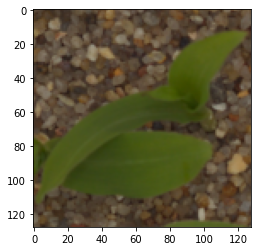

In [25]:
img = io.imread(r"C:\Users\Vishak\Great Learning\Computer Vision\Computer Vision Project\Plant Seedling Classification Data\Prediction\Predict.png") 
img = resize(image=img, output_shape=(128,128,3))  #resizing it for simpler visualization
plt.imshow(img)
plt.show()

In [89]:
pred = model.predict(np.expand_dims(img, axis = 0))[0].astype(int)
classes = (le.classes_).astype(list)
pred = dict(zip(pred, classes))
pred[1]

'Common wheat'

The model identifies this as 'Common Wheat'

### OXFLOWER 17

In [4]:
import tflearn.datasets.oxflower17 as oxflower17 

Instructions for updating:
non-resource variables are not supported in the long term
curses is not supported on this machine (please install/reinstall curses for an optimal experience)


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
X, Y = oxflower17.load_data(one_hot=True)


In [7]:
X.shape


(1360, 224, 224, 3)

In [8]:
y_labels = np.where(np.array(Y))[1]


In [9]:
y_labels

array([ 6,  8,  2, ..., 12, 16,  2], dtype=int64)

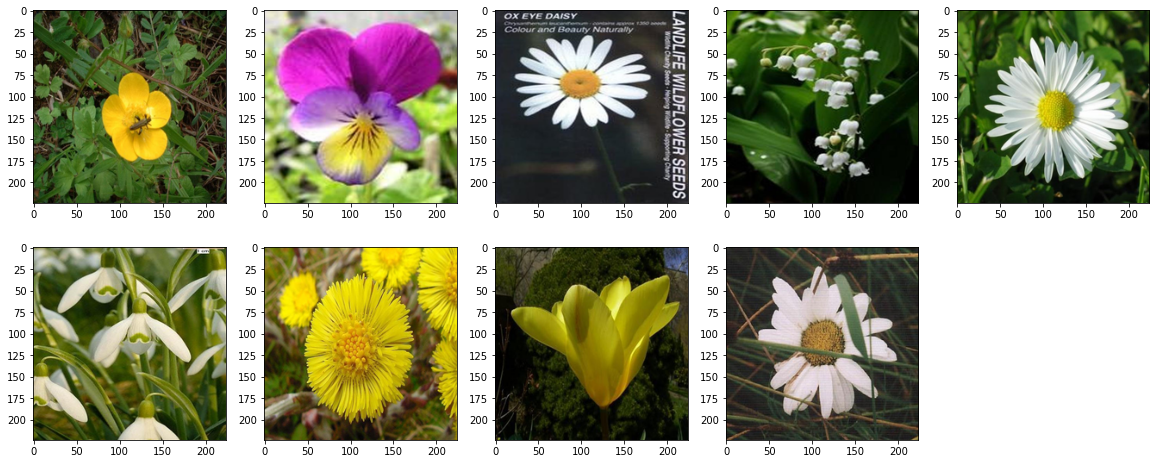

In [10]:
plt.figure(figsize=(20,8))
j=1
for i in X[0:9]:
    plt.subplot(2,5,j)
    j+=1
    plt.imshow(i)
plt.show()
  
    

In [11]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X,y_labels, test_size = 0.25, random_state = 1)

In [12]:
y_train_hot, y_test_hot = train_test_split(Y, test_size = 0.25, random_state = 1)

In [13]:
(np.where(np.array(y_train_hot))[1] == y_train).any()

True

In [14]:
x_train = np.asarray(x_train) #if any confusion occurs just run the above cells againt to get back the original form. 
x_test = np.asarray(x_test)


#Min Max scaling of the training and test arrays. 

x_train = (x_train -np.min(x_train))/(np.max(x_train) - np.min(x_train))
x_test = (x_test-np.min(x_test))/(np.max(x_test) - np.min(x_test))                                 

In [15]:
x_train_flat  = x_train.reshape(x_train.shape[0],x_train.shape[1]*x_train.shape[2]*x_train.shape[3])
x_test_flat  = x_test.reshape(x_test.shape[0],x_test.shape[1]*x_test.shape[2]*x_test.shape[3])

In [16]:
x_train_flat.shape

(1020, 150528)

In [17]:
x_train.shape

(1020, 224, 224, 3)

In [12]:
from sklearn.linear_model import LogisticRegression

#### SUPERVISED MODEL TESTING



In [13]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

Regular supervised learning models

In [14]:
def fit_n_print(model,x_train_flat,x_test_flat,y_train,y_test):
    from sklearn import metrics 
    model.fit(x_train_flat,y_train)
    pred = model.predict(x_test_flat)
    score = round(model.score(x_test_flat,y_test),3)

    
    return score
    

Ensemble Learning Models

In [15]:
def bag_n_print(model,x_train_flat,x_test_flat,y_train,y_test):
    from sklearn import metrics
    model.fit(x_train_flat,y_train)
    bgcl = BaggingClassifier(base_estimator=model, n_estimators=5, random_state=1)
    bgcl.fit(x_train_flat,y_train)
    pred = bgcl.predict(x_test_flat)
    score = bgcl.score(x_test_flat,y_test)    

    
    return score 

In [16]:
def boost_n_print(model,x_train_flat,x_test,y_train,y_test):
    from sklearn import metrics
    model.fit(x_train_flat,y_train)
    abcl = AdaBoostClassifier(base_estimator = model,n_estimators=7,random_state=1,algorithm='SAMME')
    
    #[Discrete SAMME AdaBoost adapts based on errors in predicted class labels whereas real SAMME.R uses
    #the predicted class probabilities.]
    
    abcl = abcl.fit(x_train_flat,y_train)
    pred = abcl.predict(x_test_flat)
    score = abcl.score(x_test_flat,y_test)
    

    
    return score

In [19]:
lr = LogisticRegression(solver = 'liblinear',max_iter=500)
lr_accuracy = fit_n_print(lr,x_train_flat,x_test_flat,y_train,y_test)

In [18]:
lr_result = pd.DataFrame({'Model':['lr_og'],
                       'Accuracy':[lr_accuracy]})
lr_result

,Model,Accuracy
0,lr_og,0.409


 The loss fails to converge for a regular logistic regresssion model. 

In [21]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
knn = KNeighborsClassifier()

In [22]:
lr_accuracy = fit_n_print(knn,x_train_flat,x_test_flat,y_train,y_test) 

In [23]:
temp_result = pd.DataFrame({'Model':['knn_og'],
                       'Accuracy':[lr_accuracy]})

lr_result = pd.concat([lr_result,temp_result],axis = 0)
lr_result

,Model,Accuracy
0,lr_og,0.409
0,knn_og,0.262


In [25]:
svm = SVC(gamma='auto', kernel = 'poly', degree = 3, max_iter = 1000)
accuracy = fit_n_print(svm,x_train_flat,x_test_flat,y_train,y_test) 

In [26]:
temp_result = pd.DataFrame({'Model':['SVC'],
                       'Accuracy':[accuracy]})

lr_result = pd.concat([lr_result,temp_result],axis = 0)
lr_result

,Model,Accuracy
0,lr_og,0.409
0,knn_og,0.262
0,SVC,0.032


In [28]:
from sklearn.linear_model import SGDClassifier

In [29]:
sgdc = SGDClassifier(max_iter = 1500, learning_rate = 'constant', eta0 = 0.01)
sgdc.fit(x_train_flat, y_train)

SGDClassifier(eta0=0.01, learning_rate='constant', max_iter=1500)

In [31]:
score = sgdc.score(x_test_flat,y_test)

In [32]:
temp_result = pd.DataFrame({'Model':['SGDC'],
                       'Accuracy':[score]})

lr_result = pd.concat([lr_result,temp_result],axis = 0)
lr_result

,Model,Accuracy
0,lr_og,0.409000
0,knn_og,0.262000
0,SVC,0.032000
0,SGDC,0.373529


###### Therefore it's evident that regular supervised algorithms aren't powerful enough to reach even an average accuracy level. 

#### **TRAINING NEURAL NETWORKS**

In [ ]:
import tflearn.datasets.oxflower17 as oxflower17 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
X, Y = oxflower17.load_data(one_hot=True)


In [ ]:
X.shape


(1360, 224, 224, 3)

In [ ]:
y_labels = np.where(np.array(Y))[1]


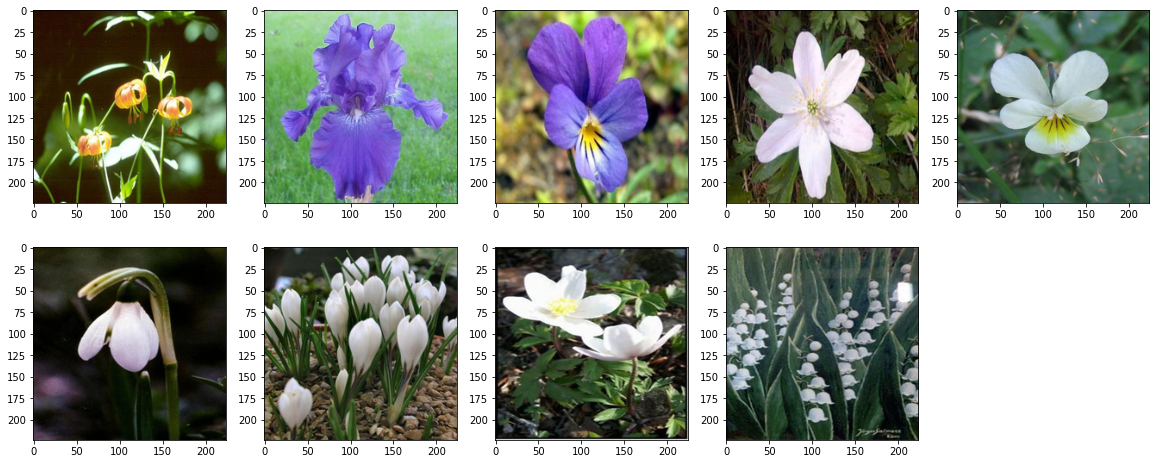

In [ ]:
plt.figure(figsize=(20,8))
j=1
for i in X[0:9]:
    plt.subplot(2,5,j)
    j+=1
    plt.imshow(i)
plt.show()
  
    

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X,y_labels, test_size = 0.25, random_state = 1)

In [ ]:
y_train_hot, y_test_hot = train_test_split(Y, test_size = 0.25, random_state = 1)

In [ ]:
(np.where(np.array(y_train_hot))[1] == y_train).any()

True

In [ ]:
x_train = np.asarray(x_train) #if any confusion occurs just run the above cells againt to get back the original form. 
x_test = np.asarray(x_test)


#Min Max scaling of the training and test arrays. 

x_train = (x_train -np.min(x_train))/(np.max(x_train) - np.min(x_train))
x_test = (x_test-np.min(x_test))/(np.max(x_test) - np.min(x_test))                                 

In [ ]:
x_train_flat  = x_train.reshape(x_train.shape[0],x_train.shape[1]*x_train.shape[2]*x_train.shape[3])
x_test_flat  = x_test.reshape(x_test.shape[0],x_test.shape[1]*x_test.shape[2]*x_test.shape[3])

In [ ]:
x_train_flat.shape

(1020, 150528)

In [ ]:
x_train.shape

(1020, 224, 224, 3)

In [ ]:
import tensorflow as tf

from tensorflow.keras.models import Sequential  # initial NN
from tensorflow.keras.layers import Dense, Dropout # construct each layer
from tensorflow.keras.layers import Conv2D # swipe across the image by 1
from tensorflow.keras.layers import MaxPooling2D # swipe across by pool size
from tensorflow.keras.layers import Flatten

In [ ]:
import numpy as np
import cv2

In [ ]:
x_train_smol = []
for i in x_train: 
    i = cv2.resize(i,(64,64))
    x_train_smol.append(i)
x_train_smol = np.asarray(x_train_smol)
# x_train_smol.shape
x_smol_flat = x_train_smol.reshape(x_train_smol.shape[0],x_train_smol.shape[1]*x_train_smol.shape[2]*x_train_smol.shape[3])
x_smol_flat.shape

(1020, 12288)

In [ ]:
from tensorflow.keras import optimizers, regularizers
from tensorflow.keras.optimizers import Adam

def train_and_test_loop(iterations, learning_rate, verb=True):
            
#             model = Sequential()
#             model.add(Dense(units = 8, input_shape = (12288,),activation=None))
#             model.add(Dense(units = 512, activation = 'relu')) 
#             model.add(Dropout(0.2))
#             model.add(Dense(units = 256, activation = 'relu'))
#             model.add(Dropout(0.2))
#             model.add(Dense(units = 128, activation = 'relu')) 
#             model.add(Dropout(0.2))
#             # output layer
#             model.add(Dense(units = 17, activation = 'softmax')) 
            model = Sequential([Flatten(input_shape = [64,64,3])])
            # fully connected layer 
            model.add(Dense(units = 1024, activation = 'relu')) 
            model.add(Dropout(0.2))
            model.add(Dense(units = 512, activation = 'relu')) 
            model.add(Dropout(0.2))
            # model.add(Dense(units = 256, activation = 'relu'))
            model.add(Dropout(0.2))
            model.add(Dense(units = 128, activation = 'relu')) 
            model.add(Dropout(0.2))
            # output layer
            model.add(Dense(units = 17, activation = 'softmax')) 

            # sgd = optimizers.SGD(lr = learning_rate, decay = 1e-6, momentum = 0.9)
            # model.compile(loss='categorical_crossentropy',optimizer=sgd, metrics = ['accuracy'])
            optimizer = Adam(lr=learning_rate)
            model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])   

            model.fit(x_train_smol, y_train_hot, epochs=iterations, batch_size=32, verbose= 1)
            # score = model.evaluate(x_train, y_train_hot, verbose=0)

In [ ]:
lr = 0.0001

train_and_test_loop(1, lr)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Train on 1020 samples
1020/1020 [==============================] - 0s 281us/sample - loss: 2.9448 - acc: 0.0873


In [ ]:
lr = 0.01
train_and_test_loop(1, lr)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Train on 1020 samples
1020/1020 [==============================] - 0s 266us/sample - loss: 34.8784 - acc: 0.0520


In [ ]:
lr = 0.001
train_and_test_loop(1, lr)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Train on 1020 samples
1020/1020 [==============================] - 0s 269us/sample - loss: 4.1122 - acc: 0.0637


In [ ]:
lr = 0.0001
train_and_test_loop(100, lr)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Train on 1020 samples
Epoch 1/100
1020/1020 [==============================] - 0s 452us/sample - loss: 2.9640 - acc: 0.0824
Epoch 2/100
1020/1020 [==============================] - 0s 365us/sample - loss: 2.7246 - acc: 0.1333
Epoch 3/100
1020/1020 [==============================] - 0s 361us/sample - loss: 2.5602 - acc: 0.1676
Epoch 4/100
1020/1020 [==============================] - 0s 345us/sample - loss: 2.4509 - acc: 0.1971
Epoch 5/100
1020/1020 [==============================] - 0s 336us/sample - loss: 2.3257 - acc: 0.2402
Epoch 6/100
1020/1020 [==============================] - 0s 357us/sample - loss: 2.2774 - acc: 0.2510
Epoch 7/100
1020/1020 [==============================] - 0s 342us/sample - loss: 2.1601 - acc: 0.2725
Epoch 8/100
1020/1020 [==============================] - 0s 348us/sample - loss: 2.1004 - acc: 0.2931
Epoch 9/100
1020/1020 [==============================] - 0s 355us/sample - loss: 2.0136 - acc: 0.3314
Epoch 10/100
1020/1020 [==============================] - 0s

In [ ]:
model = Sequential()

model.add(Conv2D(32, (5,5), activation ='relu', input_shape = (128, 128, 3))) #32 filters of kernel size 3,3. 
model.add(MaxPooling2D(pool_size=3))
#model.add(Dropout(0.2))

model.add(Conv2D(filters=64, kernel_size=4, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
#model.add(Dropout(0.2))

model.add(Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))

model.add(Conv2D(filters=128, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))

model.add(Flatten()) 
# fully connected layer 
model.add(Dense(units = 1024, activation = 'relu')) 
# model.add(Dropout(0.2))
model.add(Dense(units = 512, activation = 'relu')) 
model.add(Dropout(0.2))
model.add(Dense(units = 256, activation = 'relu'))
# model.add(Dropout(0.2))
model.add(Dense(units = 128, activation = 'relu')) 
model.add(Dropout(0.2))
# output layer
model.add(Dense(units = 17, activation = 'softmax')) 



In [ ]:
optimizer = Adam(lr=0.001)
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])   

model.fit(x_train_smol, y_train_hot, epochs=100, batch_size=16, verbose= 1,validation_data=(x_test_smol, y_test_hot))
score = model.evaluate(x_train_smol, y_train_hot, verbose=0)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Train on 1020 samples, validate on 340 samples
Epoch 1/100
1008/1020 [============================>.] - ETA: 0s - loss: 2.5816 - acc: 0.1637

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2426: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


1020/1020 [==============================] - 3s 3ms/sample - loss: 2.5735 - acc: 0.1676 - val_loss: 2.2067 - val_acc: 0.2029
Epoch 2/100
1020/1020 [==============================] - 2s 2ms/sample - loss: 2.1322 - acc: 0.2588 - val_loss: 2.0813 - val_acc: 0.2853
Epoch 3/100
1020/1020 [==============================] - 2s 2ms/sample - loss: 2.0408 - acc: 0.2951 - val_loss: 2.0595 - val_acc: 0.2441
Epoch 4/100
1020/1020 [==============================] - 2s 2ms/sample - loss: 1.8488 - acc: 0.3471 - val_loss: 1.6621 - val_acc: 0.4382
Epoch 5/100
1020/1020 [==============================] - 2s 2ms/sample - loss: 1.7089 - acc: 0.4088 - val_loss: 1.5582 - val_acc: 0.4206
Epoch 6/100
1020/1020 [==============================] - 2s 2ms/sample - loss: 1.6545 - acc: 0.4196 - val_loss: 1.5692 - val_acc: 0.4176
Epoch 7/100
1020/1020 [==============================] - 2s 2ms/sample - loss: 1.4601 - acc: 0.4608 - val_loss: 1.4561 - val_acc: 0.4529
Epoch 8/100
1020/1020 [==============================

In [ ]:
optimizer = Adam(lr=0.01)
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])   

model.fit(x_train_smol, y_train_hot, epochs=100, batch_size=32, verbose= 1,validation_data=(x_test_smol, y_test_hot))
score = model.evaluate(x_train_smol, y_train_hot, verbose=0)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Train on 1020 samples, validate on 340 samples
Epoch 1/100
1020/1020 [==============================] - ETA: 0s - loss: 3.4074 - acc: 0.1235

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2426: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


1020/1020 [==============================] - 3s 3ms/sample - loss: 3.4074 - acc: 0.1235 - val_loss: 2.7482 - val_acc: 0.0647
Epoch 2/100
1020/1020 [==============================] - 1s 1ms/sample - loss: 2.8679 - acc: 0.0520 - val_loss: 2.8353 - val_acc: 0.0559
Epoch 3/100
1020/1020 [==============================] - 1s 1ms/sample - loss: 2.8353 - acc: 0.0598 - val_loss: 2.8393 - val_acc: 0.0559
Epoch 4/100
1020/1020 [==============================] - 1s 1ms/sample - loss: 2.8335 - acc: 0.0539 - val_loss: 2.8452 - val_acc: 0.0412
Epoch 5/100
1020/1020 [==============================] - 1s 1ms/sample - loss: 2.8330 - acc: 0.0647 - val_loss: 2.8484 - val_acc: 0.0412
Epoch 6/100
1020/1020 [==============================] - 1s 1ms/sample - loss: 2.8322 - acc: 0.0598 - val_loss: 2.8499 - val_acc: 0.0353
Epoch 7/100
1020/1020 [==============================] - 1s 1ms/sample - loss: 2.8326 - acc: 0.0667 - val_loss: 2.8513 - val_acc: 0.0353
Epoch 8/100
1020/1020 [==============================

In [ ]:
model = Sequential()

model.add(Conv2D(32, (5,5), activation ='relu', input_shape = (128, 128, 3))) #32 filters of kernel size 3,3. 
model.add(MaxPooling2D(pool_size=3))
model.add(Dropout(0.2))

model.add(Conv2D(filters=64, kernel_size=4, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
#model.add(Dropout(0.2))

model.add(Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
# model.add(Dropout(0.2))

model.add(Conv2D(filters=128, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))

model.add(Flatten()) 
# fully connected layer 
model.add(Dense(units = 1024, activation = 'relu')) 
# model.add(Dropout(0.2))
model.add(Dense(units = 512, activation = 'relu')) 
model.add(Dropout(0.2))
model.add(Dense(units = 256, activation = 'relu'))
# model.add(Dropout(0.2))
model.add(Dense(units = 128, activation = 'relu')) 
model.add(Dropout(0.2))
# output layer
model.add(Dense(units = 17, activation = 'softmax')) 



In [ ]:
optimizer = Adam(lr=0.001)
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])   

model.fit(x_train_smol, y_train_hot, epochs=100, batch_size=64, verbose= 1,validation_data=(x_test_smol, y_test_hot))
score = model.evaluate(x_train_smol, y_train_hot, verbose=0)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Train on 1020 samples, validate on 340 samples
Epoch 1/100
1020/1020 [==============================] - ETA: 0s - loss: 2.8351 - acc: 0.0686

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2426: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


1020/1020 [==============================] - 2s 2ms/sample - loss: 2.8351 - acc: 0.0686 - val_loss: 2.7517 - val_acc: 0.0765
Epoch 2/100
1020/1020 [==============================] - 1s 1ms/sample - loss: 2.5956 - acc: 0.1137 - val_loss: 2.4659 - val_acc: 0.1676
Epoch 3/100
1020/1020 [==============================] - 1s 1ms/sample - loss: 2.3553 - acc: 0.1686 - val_loss: 2.3022 - val_acc: 0.2118
Epoch 4/100
1020/1020 [==============================] - 1s 1ms/sample - loss: 2.1868 - acc: 0.2304 - val_loss: 2.1242 - val_acc: 0.2176
Epoch 5/100
1020/1020 [==============================] - 1s 1ms/sample - loss: 1.9706 - acc: 0.2912 - val_loss: 1.9151 - val_acc: 0.3382
Epoch 6/100
1020/1020 [==============================] - 1s 1ms/sample - loss: 1.8178 - acc: 0.3324 - val_loss: 1.8325 - val_acc: 0.3559
Epoch 7/100
1020/1020 [==============================] - 1s 1ms/sample - loss: 1.7227 - acc: 0.3843 - val_loss: 1.7496 - val_acc: 0.4029
Epoch 8/100
1020/1020 [==============================

Therefore it's clear that Neural Networks across all possible combinations of parameter values saturate at 0.66 val accuracy on average. 

#### **USING PRETRAINED MODELS: vgg16 and Xception**

# **VGG 16**

In [ ]:
from tensorflow.keras.applications import Xception
from tensorflow.keras.applications import VGG16

In [ ]:
base_model = VGG16(include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=(224, 224, 3),
    pooling=None,
    classes=17,
    classifier_activation="softmax")

58892288/58889256 [==============================] - 2s 0us/step


In [ ]:
base_model.trainable = False

In [ ]:
input_shape = (2, 4, 5, 3)
x = tf.random.normal(input_shape)
y = tf.keras.layers.Flatten()(x)
print(y.shape)


(2, 60)


In [ ]:
inputs = tf.keras.Input(shape=(224, 224, 3))
# We make sure that the base_model is running in inference mode here,
# by passing `training=False`. This is important for fine-tuning, as you will
# learn in a few paragraphs.
x = base_model(inputs, training=False)
# Convert features of shape `base_model.output_shape[1:]` to vectors
x = tf.keras.layers.Flatten()(x)
# A Dense classifier with a single unit (binary classification)
outputs = tf.keras.layers.Dense(17)(x)
model = tf.keras.Model(inputs, outputs)

In [ ]:
optimizer = Adam(lr=0.01)
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])   

model.fit(x_train, y_train_hot, epochs=10, batch_size=50, verbose= 1,validation_data=(x_test, y_test_hot))
# score = model.evaluate(x_train, y_train_hot, verbose=0)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Train on 1020 samples, validate on 340 samples
Epoch 1/10
1020/1020 [==============================] - ETA: 0s - loss: 11.2985 - acc: 0.2539

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2426: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


1020/1020 [==============================] - 3s 3ms/sample - loss: 11.2985 - acc: 0.2539 - val_loss: 10.9508 - val_acc: 0.1794
Epoch 2/10
1020/1020 [==============================] - 3s 3ms/sample - loss: 11.2985 - acc: 0.2539 - val_loss: 10.9508 - val_acc: 0.1794
Epoch 3/10
1020/1020 [==============================] - 3s 3ms/sample - loss: 11.2985 - acc: 0.2539 - val_loss: 10.9508 - val_acc: 0.1794
Epoch 4/10
1020/1020 [==============================] - 3s 3ms/sample - loss: 11.2985 - acc: 0.2539 - val_loss: 10.9508 - val_acc: 0.1794
Epoch 5/10
1020/1020 [==============================] - 3s 3ms/sample - loss: 11.2985 - acc: 0.2539 - val_loss: 10.9508 - val_acc: 0.1794
Epoch 6/10
1020/1020 [==============================] - 3s 3ms/sample - loss: 11.2985 - acc: 0.2539 - val_loss: 10.9508 - val_acc: 0.1794
Epoch 7/10
1020/1020 [==============================] - 3s 3ms/sample - loss: 11.2985 - acc: 0.2539 - val_loss: 10.9508 - val_acc: 0.1794
Epoch 8/10
1020/1020 [=======================

In [ ]:
x_test.shape

(340, 224, 224, 3)

In [ ]:
inputs = tf.keras.Input(shape=(224, 224, 3))
# We make sure that the base_model is running in inference mode here,
# by passing `training=False`. This is important for fine-tuning, as you will
# learn in a few paragraphs.
x = base_model(inputs, training=False)
# Convert features of shape `base_model.output_shape[1:]` to vectors

x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(units = 1024, activation = 'relu')(x)
x = tf.keras.layers.Dense(units = 512, activation = 'relu')(x)
x = tf.keras.layers.Dense(units = 256, activation = 'relu')(x)
x = tf.keras.layers.Dense(units = 128, activation = 'relu')(x)
# A Dense classifier with a single unit (binary classification)
outputs = tf.keras.layers.Dense(17)(x)
model = tf.keras.Model(inputs, outputs)

In [ ]:
optimizer = Adam(lr=0.1)
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])   

model.fit(x_train, y_train_hot, epochs=10, batch_size=50, verbose= 1,validation_data=(x_test, y_test_hot))
# score = model.evaluate(x_train, y_train_hot, verbose=0)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Train on 1020 samples, validate on 340 samples
Epoch 1/10
1020/1020 [==============================] - ETA: 0s - loss: 5.3995 - acc: 0.0559

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2426: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


1020/1020 [==============================] - 3s 3ms/sample - loss: 5.3995 - acc: 0.0559 - val_loss: 5.3986 - val_acc: 0.0412
Epoch 2/10
1020/1020 [==============================] - 3s 3ms/sample - loss: 5.6269 - acc: 0.0569 - val_loss: 3.4853 - val_acc: 0.0412
Epoch 3/10
1020/1020 [==============================] - 3s 3ms/sample - loss: 3.0017 - acc: 0.0608 - val_loss: 2.8420 - val_acc: 0.0735
Epoch 4/10
1020/1020 [==============================] - 3s 3ms/sample - loss: 2.8449 - acc: 0.0539 - val_loss: 2.8531 - val_acc: 0.0735
Epoch 5/10
1020/1020 [==============================] - 3s 3ms/sample - loss: 2.8332 - acc: 0.0569 - val_loss: 2.8494 - val_acc: 0.0794
Epoch 6/10
1020/1020 [==============================] - 3s 3ms/sample - loss: 2.8334 - acc: 0.0529 - val_loss: 2.8510 - val_acc: 0.0794
Epoch 7/10
1020/1020 [==============================] - 3s 3ms/sample - loss: 2.8334 - acc: 0.0520 - val_loss: 2.8531 - val_acc: 0.0794
Epoch 8/10
1020/1020 [==============================] - 3s 

In [ ]:
base_model.trainable = True

In [ ]:
inputs = tf.keras.Input(shape=(224, 224, 3))
# We make sure that the base_model is running in inference mode here,
# by passing `training=False`. This is important for fine-tuning, as you will
# learn in a few paragraphs.
x = base_model(inputs, training=False)
# Convert features of shape `base_model.output_shape[1:]` to vectors

x = tf.keras.layers.Flatten()(x)
# x = tf.keras.layers.Dense(units = 1024, activation = 'relu')(x)
# x = tf.keras.layers.Dense(units = 512, activation = 'relu')(x)
# x = tf.keras.layers.Dense(units = 256, activation = 'relu')(x)
# x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(units = 128, activation = 'relu')(x)
x = tf.keras.layers.Dense(units = 64, activation = 'relu')(x)
x = tf.keras.layers.Dense(units = 32, activation = 'relu')(x)
# A Dense classifier with a single unit (binary classification)
outputs = tf.keras.layers.Dense(17, activation = 'softmax')(x)
model = tf.keras.Model(inputs, outputs)

In [ ]:
optimizer = Adam(lr=1e-5)
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])   

model.fit(x_train, y_train_hot, epochs=10, batch_size=32, verbose= 1,validation_data=(x_test, y_test_hot))
# score = model.evaluate(x_train, y_train_hot, verbose=0)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Train on 1020 samples, validate on 340 samples
Epoch 1/10
1020/1020 [==============================] - ETA: 0s - loss: 2.8307 - acc: 0.0647

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2426: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


1020/1020 [==============================] - 8s 8ms/sample - loss: 2.8307 - acc: 0.0647 - val_loss: 2.8487 - val_acc: 0.0412
Epoch 2/10
1020/1020 [==============================] - 7s 7ms/sample - loss: 2.8307 - acc: 0.0647 - val_loss: 2.8487 - val_acc: 0.0412
Epoch 3/10
1020/1020 [==============================] - 7s 7ms/sample - loss: 2.8307 - acc: 0.0647 - val_loss: 2.8487 - val_acc: 0.0412
Epoch 4/10
1020/1020 [==============================] - 7s 7ms/sample - loss: 2.8307 - acc: 0.0647 - val_loss: 2.8487 - val_acc: 0.0412
Epoch 5/10
1020/1020 [==============================] - 7s 7ms/sample - loss: 2.8307 - acc: 0.0647 - val_loss: 2.8487 - val_acc: 0.0412
Epoch 6/10
 768/1020 [=====================>........] - ETA: 1s - loss: 2.8274 - acc: 0.0716

KeyboardInterrupt: ignored

In [ ]:
x_train_smol.shape

(1020, 64, 64, 3)

In [ ]:
base_model = VGG16(include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=(64, 64, 3),
    pooling=None,
    classes=17,
    classifier_activation="softmax")

58892288/58889256 [==============================] - 2s 0us/step


In [ ]:
base_model.trainable = False

In [ ]:
inputs = tf.keras.Input(shape=(64, 64, 3))
# We make sure that the base_model is running in inference mode here,
# by passing `training=False`. This is important for fine-tuning, as you will
# learn in a few paragraphs.
x = base_model(inputs, training=False)
# Convert features of shape `base_model.output_shape[1:]` to vectors

x = tf.keras.layers.Flatten()(x)
# x = tf.keras.layers.Dense(units = 1024, activation = 'relu')(x)
# x = tf.keras.layers.Dense(units = 512, activation = 'relu')(x)
# x = tf.keras.layers.Dense(units = 256, activation = 'relu')(x)
# x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(units = 128, activation = 'relu')(x)
x = tf.keras.layers.Dense(units = 64, activation = 'relu')(x)
x = tf.keras.layers.Dense(units = 32, activation = 'relu')(x)
# A Dense classifier with a single unit (binary classification)
outputs = tf.keras.layers.Dense(17, activation = 'softmax')(x)
model = tf.keras.Model(inputs, outputs)

In [ ]:
optimizer = Adam(lr=1e-5)
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])   

model.fit(x_train_smol, y_train_hot, epochs=10, batch_size=32, verbose= 1) #,validation_data=(x_test_smol, y_test_hot)
# score = model.evaluate(x_train, y_train_hot, verbose=0)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Train on 1020 samples
Epoch 1/10
1020/1020 [==============================] - 1s 1ms/sample - loss: 2.7663 - acc: 0.0853
Epoch 2/10
1020/1020 [==============================] - 1s 922us/sample - loss: 2.4972 - acc: 0.2118
Epoch 3/10
1020/1020 [==============================] - 1s 924us/sample - loss: 1.9655 - acc: 0.3529
Epoch 4/10
1020/1020 [==============================] - 1s 938us/sample - loss: 1.3835 - acc: 0.5510
Epoch 5/10
1020/1020 [==============================] - 1s 928us/sample - loss: 0.9469 - acc: 0.6951
Epoch 6/10
1020/1020 [==============================] - 1s 936us/sample - loss: 0.6603 - acc: 0.8078
Epoch 7/10
1020/1020 [==============================] - 1s 922us/sample - loss: 0.4578 - acc: 0.8755
Epoch 8/10
1020/1020 [==============================] - 1s 922us/sample - loss: 0.2863 - acc: 0.9353
Epoch 9/10
1020/1020 [==============================] - 1s 926us/sample - loss: 0.1801 - acc: 0.9627
Epoch 10/10
1020/1020 [==============================] - 1s 925us/sampl

In [ ]:
x_test_smol = []
for i in x_test: 
    i = cv2.resize(i,(64,64))
    x_test_smol.append(i)
x_test_smol = np.asarray(x_test_smol)
# x_test_smol.shape
x_smol_flat = x_test_smol.reshape(x_test_smol.shape[0],x_test_smol.shape[1]*x_test_smol.shape[2]*x_test_smol.shape[3])
x_smol_flat.shape

(340, 12288)

In [ ]:
optimizer = Adam(lr=1e-5)
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])   

model.fit(x_train_smol, y_train_hot, epochs=15, batch_size=32, verbose= 1,validation_data=(x_test_smol, y_test_hot))
score = model.evaluate(x_train_smol, y_train_hot, verbose=0)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Train on 1020 samples, validate on 340 samples
Epoch 1/15
 992/1020 [============================>.] - ETA: 0s - loss: 0.0279 - acc: 0.9950

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2426: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


1020/1020 [==============================] - 2s 2ms/sample - loss: 0.0275 - acc: 0.9951 - val_loss: 1.2183 - val_acc: 0.7618
Epoch 2/15
1020/1020 [==============================] - 1s 1ms/sample - loss: 0.0613 - acc: 0.9833 - val_loss: 1.1077 - val_acc: 0.8000
Epoch 3/15
1020/1020 [==============================] - 1s 1ms/sample - loss: 0.0222 - acc: 0.9971 - val_loss: 1.1229 - val_acc: 0.8176
Epoch 4/15
1020/1020 [==============================] - 1s 1ms/sample - loss: 0.0128 - acc: 0.9980 - val_loss: 1.2206 - val_acc: 0.7647
Epoch 5/15
1020/1020 [==============================] - 1s 1ms/sample - loss: 0.0057 - acc: 1.0000 - val_loss: 1.3078 - val_acc: 0.7882
Epoch 6/15
1020/1020 [==============================] - 1s 1ms/sample - loss: 0.0026 - acc: 1.0000 - val_loss: 1.2851 - val_acc: 0.7735
Epoch 7/15
1020/1020 [==============================] - 1s 1ms/sample - loss: 0.0015 - acc: 1.0000 - val_loss: 1.3113 - val_acc: 0.7794
Epoch 8/15
1020/1020 [==============================] - 1s 

In [ ]:
inputs = tf.keras.Input(shape=(64, 64, 3))
# We make sure that the base_model is running in inference mode here,
# by passing `training=False`. This is important for fine-tuning, as you will
# learn in a few paragraphs.
x = base_model(inputs, training=False)
# Convert features of shape `base_model.output_shape[1:]` to vectors

x = tf.keras.layers.Flatten()(x)
# x = tf.keras.layers.Dense(units = 1024, activation = 'relu')(x)
# x = tf.keras.layers.Dense(units = 512, activation = 'relu')(x)
# x = tf.keras.layers.Dense(units = 256, activation = 'relu')(x)
x = tf.keras.layers.Dense(units = 128, activation = 'relu')(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(units = 64, activation = 'relu')(x)
x = tf.keras.layers.Dropout(0.1)(x)
x = tf.keras.layers.Dense(units = 32, activation = 'relu')(x)
# A Dense classifier with a single unit (binary classification)
outputs = tf.keras.layers.Dense(17, activation = 'softmax')(x)
model = tf.keras.Model(inputs, outputs)

In [ ]:
optimizer = Adam(lr=1e-5)
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])   

model.fit(x_train_smol, y_train_hot, epochs=1000, batch_size=32, verbose= 1,validation_data=(x_test_smol, y_test_hot))
score = model.evaluate(x_train_smol, y_train_hot, verbose=0)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Train on 1020 samples, validate on 340 samples
Epoch 1/1000
 992/1020 [============================>.] - ETA: 0s - loss: 2.9107 - acc: 0.0786

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2426: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


1020/1020 [==============================] - 3s 3ms/sample - loss: 2.9112 - acc: 0.0775 - val_loss: 2.7681 - val_acc: 0.1265
Epoch 2/1000
1020/1020 [==============================] - 1s 1ms/sample - loss: 2.7451 - acc: 0.1186 - val_loss: 2.6345 - val_acc: 0.1588
Epoch 3/1000
1020/1020 [==============================] - 1s 1ms/sample - loss: 2.5664 - acc: 0.1814 - val_loss: 2.3615 - val_acc: 0.3000
Epoch 4/1000
1020/1020 [==============================] - 1s 1ms/sample - loss: 2.2620 - acc: 0.2784 - val_loss: 1.9298 - val_acc: 0.4441
Epoch 5/1000
1020/1020 [==============================] - 1s 1ms/sample - loss: 1.9150 - acc: 0.3931 - val_loss: 1.5839 - val_acc: 0.5235
Epoch 6/1000
1020/1020 [==============================] - 1s 1ms/sample - loss: 1.5830 - acc: 0.4961 - val_loss: 1.3463 - val_acc: 0.6235
Epoch 7/1000
1020/1020 [==============================] - 1s 1ms/sample - loss: 1.3018 - acc: 0.5853 - val_loss: 1.1646 - val_acc: 0.6941
Epoch 8/1000
1020/1020 [=======================

###### It's clear that there's not much doable to increase the validation set beyond this point, hence using transfer learning a maximum of 0.90 test accuracy could be achieved within a 100 epoch span using vgg 16. 

In [ ]:
pip install tflearn

In [ ]:
x_test_smol = []
for i in x_test: 
    i = cv2.resize(i,(128,128))
    x_test_smol.append(i)
x_test_smol = np.asarray(x_test_smol)
# x_test_smol.shape
x_smol_flat = x_test_smol.reshape(x_test_smol.shape[0],x_test_smol.shape[1]*x_test_smol.shape[2]*x_test_smol.shape[3])
x_smol_flat.shape

(340, 49152)

In [ ]:
from tensorflow.keras.applications import Xception
from tensorflow.keras.applications import VGG16

In [ ]:
base_model = Xception(include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=(128, 128, 3),
    pooling=None,
    classes=17,
    classifier_activation="softmax")

In [ ]:
inputs = tf.keras.Input(shape=(128, 128, 3))
# We make sure that the base_model is running in inference mode here,
# by passing `training=False`. This is important for fine-tuning, as you will
# learn in a few paragraphs.
x = base_model(inputs, training=False)
# Convert features of shape `base_model.output_shape[1:]` to vectors

x = tf.keras.layers.Flatten()(x)
# x = tf.keras.layers.Dense(units = 1024, activation = 'relu')(x)
# x = tf.keras.layers.Dense(units = 512, activation = 'relu')(x)
# x = tf.keras.layers.Dense(units = 256, activation = 'relu')(x)
x = tf.keras.layers.Dense(units = 128, activation = 'relu')(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(units = 64, activation = 'relu')(x)
x = tf.keras.layers.Dropout(0.1)(x)
x = tf.keras.layers.Dense(units = 32, activation = 'relu')(x)
# A Dense classifier with a single unit (binary classification)
outputs = tf.keras.layers.Dense(17, activation = 'softmax')(x)
model = tf.keras.Model(inputs, outputs)

In [ ]:
optimizer = Adam(lr=1e-5)
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])   

model.fit(x_train_smol, y_train_hot, epochs=50, batch_size=16, verbose= 1,validation_data=(x_test_smol, y_test_hot))
score = model.evaluate(x_train_smol, y_train_hot, verbose=0)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Train on 1020 samples, validate on 340 samples
Epoch 1/50
1020/1020 [==============================] - ETA: 0s - loss: 2.7263 - acc: 0.1059

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2426: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


1020/1020 [==============================] - 20s 20ms/sample - loss: 2.7263 - acc: 0.1059 - val_loss: 2.4706 - val_acc: 0.2382
Epoch 2/50
1020/1020 [==============================] - 18s 17ms/sample - loss: 2.2066 - acc: 0.3284 - val_loss: 1.7268 - val_acc: 0.5059
Epoch 3/50
1020/1020 [==============================] - 17s 17ms/sample - loss: 1.4689 - acc: 0.5559 - val_loss: 1.0838 - val_acc: 0.7294
Epoch 4/50
1020/1020 [==============================] - 18s 17ms/sample - loss: 0.9352 - acc: 0.7225 - val_loss: 0.6774 - val_acc: 0.8324
Epoch 5/50
1020/1020 [==============================] - 18s 17ms/sample - loss: 0.5109 - acc: 0.8559 - val_loss: 0.5487 - val_acc: 0.8441
Epoch 6/50
1020/1020 [==============================] - 18s 17ms/sample - loss: 0.3477 - acc: 0.9029 - val_loss: 0.5562 - val_acc: 0.8647
Epoch 7/50
1020/1020 [==============================] - 17s 17ms/sample - loss: 0.2796 - acc: 0.9167 - val_loss: 0.5209 - val_acc: 0.8676
Epoch 8/50
1020/1020 [=======================

In [ ]:
xception_weights = model.get_weights()

In [ ]:
xception_weights[0].shape

(3, 3, 3, 32)

In [ ]:
from tensorflow.keras.models import load_model
model.save("xception_model.h5")


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


## WHY ARE NEURAL NETWORKS BETTER IMAGE CLASSIFIERS THAN SUPERVISED LEARNING MACHINES:
Supervised Learning algorithms can do just fine on image classification but on scale, it's not feasible to employ supervised learning algorithms since to get the desired accuracy they could take on an average 10 to 20 times more time to produce the result neural networks can.

so why are neural networks better? Because just as much as supervised algorithms take the time to perform the required computations, neural networks perform as much the number of computations in parallel. That is because Neural Networks are basically a sophisticated interconnected array of logistic regression units aka perceptrons.

## WHY ARE CONVOLUTIONAL NEURAL NETWORKS BETTER IMAGE CLASSIFIERS THAN NEURAL NETWORKS:
CNN's perform convolutions on the image before actually performing any sort of training on them, all though learning the convolutions is also very much considered as a part of the training. This gives CNNs an edge over regular Neural Networks since the former can capture more precise and finer details of the input images than can the latter. This aspect of CNN enables it to be a stronger predictor than Neural Networks.

### TASK 3

In [1]:
import io

In [ ]:
paths = r"C:\Users\Vishak\Great Learning\Computer Vision\Computer Vision Project\Cars Images"
i = 0
for image in os.listdir(path):
    #folders for all the seedlings are being indexed across in the 'train' folder 
    img = io.imread(img_path) 
    img = resize(image=img, output_shape=(64,64,3))  #resizing it for simpler visualization
    plt.imshow(img)
    plt.show()
    

        
        
        
        
# for i in list(np.arange(1,10)):
#     img_path = paths[str(np.random.randint(1,4767))]
#     img = io.imread(img_path) 
#     img = resize(image=img, output_shape=(64,64,3))  #resizing it for simpler visualization
#     plt.imshow(img)
#     plt.show()



